In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read csv w/out header
data = pd.read_csv('Capital_Flats_2021-12-01_14_20_34.csv', header=None, low_memory=False)

# Forward fill the header name for each PowerScout
data.iloc[0] = data.T[0].fillna(method='ffill')

# Rename the 'nan' block
data.loc[0, 0] = 'Timestamp'

# Create the multi-index
data.columns = [list(data.iloc[0]), list(data.iloc[1])]

# Drop the first two rows because they're just the column names
data = data[2:].dropna(how='all', axis=1)

# Convert timestamp column to datetime format
data.Timestamp = pd.to_datetime(data.Timestamp.Timestamp, infer_datetime_format=True)

# # Set Timestamp column as index, set columns to type 'float'
data = data[2:].set_index([('Timestamp', 'Timestamp')]).replace('-', np.nan).astype(float)

In [3]:
# Slice to the two power systems we're monitoring
gross_power_cols = ['PowerScout DPS126', 'PowerScout DPS112']
gross_power = data[gross_power_cols]

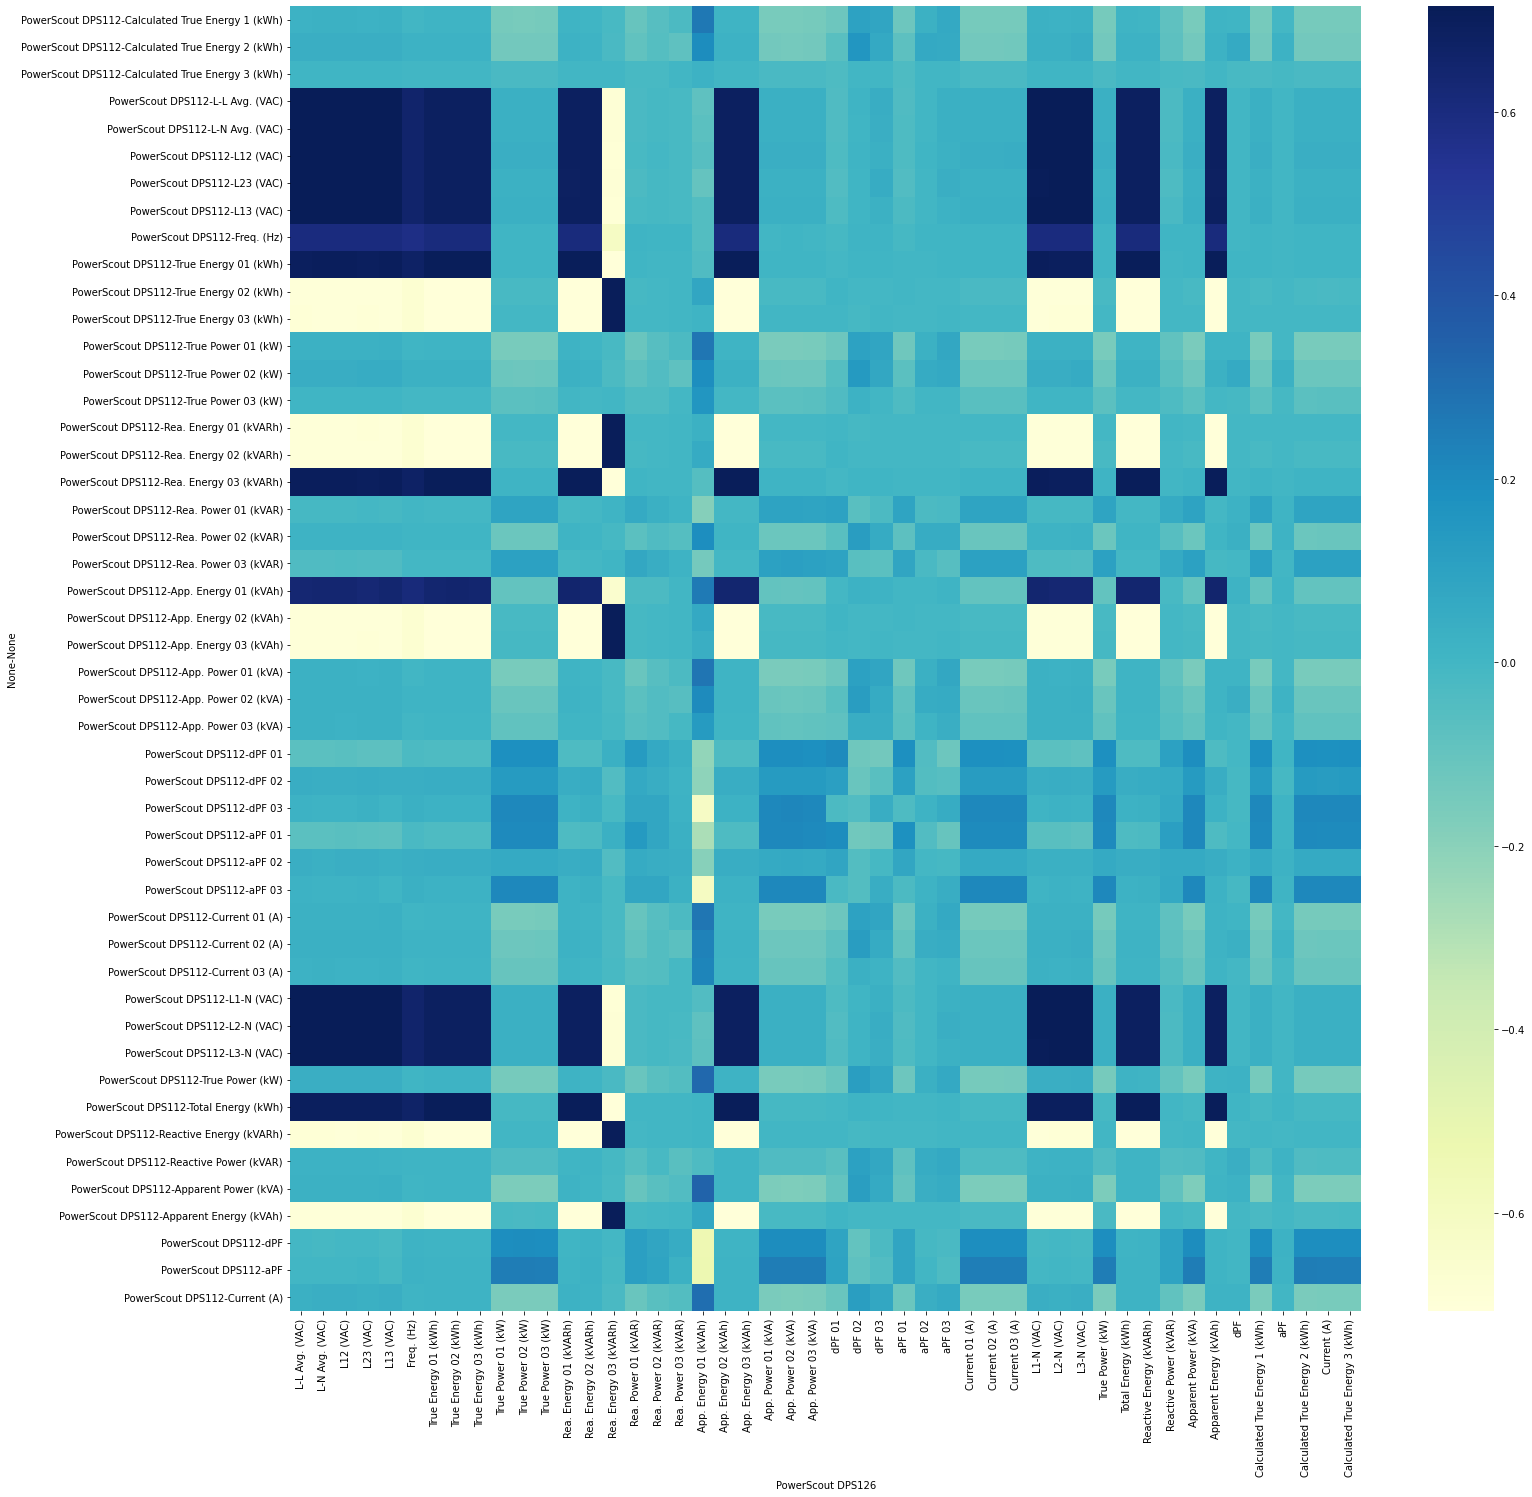

In [4]:
gp_len = gross_power.shape[1] / 4
plt.figure(figsize=(gp_len, gp_len))
hm = sns.heatmap(gross_power.corr()['PowerScout DPS126'][48:], cmap='YlGnBu')
hm.set(xlabel='PowerScout DPS126')
plt.show()

In [5]:
gross_power['PowerScout DPS126'].corrwith(gross_power['PowerScout DPS112'])

L-L Avg. (VAC)                    0.712729
L-N Avg. (VAC)                    0.711801
L12 (VAC)                         0.711067
L23 (VAC)                         0.714811
L13 (VAC)                         0.710385
Freq. (Hz)                        0.577522
True Energy 01 (kWh)              0.706896
True Energy 02 (kWh)             -0.706780
True Energy 03 (kWh)             -0.706274
True Power 01 (kW)               -0.156159
True Power 02 (kW)               -0.119103
True Power 03 (kW)               -0.068133
Rea. Energy 01 (kVARh)           -0.706823
Rea. Energy 02 (kVARh)           -0.707116
Rea. Energy 03 (kVARh)           -0.706841
Rea. Power 01 (kVAR)              0.063023
Rea. Power 02 (kVAR)             -0.039258
Rea. Power 03 (kVAR)              0.017179
App. Energy 01 (kVAh)             0.263671
App. Energy 02 (kVAh)            -0.706907
App. Energy 03 (kVAh)            -0.706844
App. Power 01 (kVA)              -0.158281
App. Power 02 (kVA)              -0.113945
App. Power 